In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load Data Set
(X_train, y_train), (X_test, y_test) = mnist.load_data()




2024-11-13 09:24:58.747023: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Neural Network
model = Sequential()  

# Add a Conv2D layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Optional: Add MaxPooling layer to reduce spatial size and computation
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))

# Optional: Add MaxPooling layer to reduce spatial size and computation
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the Conv2D layer before feeding it to Dense layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(64, activation='relu'))                        
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary to verify shapes
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8734 - loss: 0.9191 - val_accuracy: 0.9743 - val_loss: 0.0760
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9796 - loss: 0.0684 - val_accuracy: 0.9781 - val_loss: 0.0667
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9850 - loss: 0.0494 - val_accuracy: 0.9813 - val_loss: 0.0617
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9885 - loss: 0.0371 - val_accuracy: 0.9846 - val_loss: 0.0520
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9894 - loss: 0.0328 - val_accuracy: 0.9860 - val_loss: 0.0520
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9919 - loss: 0.0261 - val_accuracy: 0.9851 - val_loss: 0.0502
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9928 - loss: 0.0231 - val_accuracy: 0.9873 - val_loss: 0.0490
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9937 -

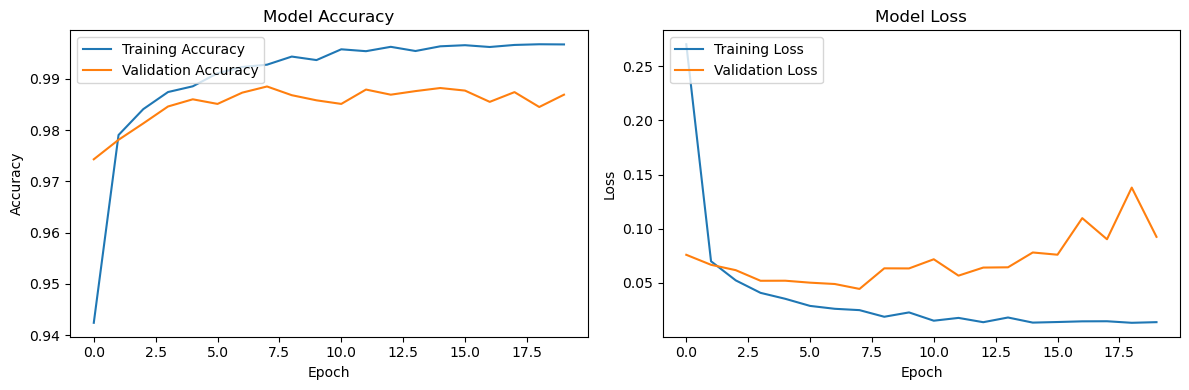

In [4]:
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by `model.fit`
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [5]:
# #Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Accuracy : {test_accuracy * 100:.2f}")
print(f"Lost : {test_loss}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9830 - loss: 0.1084
Accuracy : 98.69
Lost : 0.09253338724374771


In [ ]:
# Make sure to install the necessary packages first
# pip install --upgrade pip
# pip install tensorflow
from tensorflow import keras
from typing import List
from keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too."]

def print_bow(sentence: List[str]) -> None:
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentence)
    sequences = tokenizer.texts_to_sequences(sentence)
    word_index = tokenizer.word_index 
    bow = {}
    for key in word_index:
        bow[key] = sequences[0].count(word_index[key])

    print(f"Bag of word sentence 1:\n{bow}")
    print(f"We found {len(word_index)} unique tokens.")

print_bow(sentence)

ModuleNotFoundError: No module named 'keras.preprocessing.text'